<a href="https://colab.research.google.com/github/stevenfox/products_classification/blob/main/BrandMind_Stefanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification on shopping products using CNN with TF and Keras

Classify a given product based on 29 categories. Also perform transfer learning on a custom classifier.

* Create a TensorFlow model that performs product classification based on the available categories.
* Develop a few base models and save them models in .h5 format.
* Perform Transfer Learning on your existing model, you can use this pre-trained model for the same which is trained on the fashionMNIST dataset.
* Plot graphs for all the models that you try and save the results into a document file.




In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



import os, shutil
import matplotlib.image as mpimg
import cv2
from imutils import paths
# import pickle
import random



Paths


In [2]:
drive_dataset_dir= '/content/drive/MyDrive/Colab Notebooks/BrandMind_Assessment/Products'
dataset_dir = '/content/products'

In [3]:
# Copy dataset to the local workplace so it can be accesed faster

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

In [4]:
# copy folder to the google colab workplace
copytree(drive_dataset_dir, dataset_dir)

## Dataset Preprocessing

In [5]:
data = []
labels = []

In [6]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset_dir)))

In [7]:
#total number images
total_number_of_images = len(imagePaths)
print("Total number of images----->",total_number_of_images)
random.shuffle(imagePaths)

Total number of images-----> 9398


In [8]:
# loop over the shuffled input images
for imagePath in imagePaths:

  #Read the image into a numpy array using opencv
  #all the read images are of different shapes
  image = cv2.imread(imagePath)

  #resize the image to be 32x32 pixels (ignoring aspect ratio)
  #After reshape size of all the images will become 32x32x3
  #Total number of pixels in every image = 32x32x3=3072
  image = cv2.resize(image, (32, 32))

  #flatten converts every 3D image (32x32x3) into 1D numpy array of shape

  image_flatten = image.flatten()

  #Append each image data 1D array to the data list
  data.append(image_flatten)

  # extract the class label from the image path and update the
  label = imagePath.split(os.path.sep)[-2]
  #Append each image label to the labels list
  labels.append(label)
  # print(imagePath)
# scale the raw pixel intensities to the range [0, 1]
#convert the data and label list to numpy array
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [9]:
# partition the data into training, and testing splits using 80% of
# the data for training and the remaining 20% for validating
# train_test_split is a scikit-learn's function which helps us to split images into two devisions of training and testing respectively

(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.2, random_state=1) # initial split of 80% / 20%

print("Amount of training images --->",len(X_train),",","Amount of training labels --->",len(y_train))
print("Amount of testing images --->",len(X_test),",","Amount of testing labels --->",len(y_test))



Amount of training images ---> 7518 , Amount of training labels ---> 7518
Amount of testing images ---> 1880 , Amount of testing labels ---> 1880


In [10]:
# convert the labels from integers to vectors 
# perform One hot encoding of all the labels using scikit-learn's function LabelBinarizer
# LabelBinarizer fit_transform finds all the labels

lb = preprocessing.LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)


In [11]:
print("\n")
print ("Classes found to train",)
train_classes = lb.classes_
print(train_classes)
binary_rep_each_class = lb.transform(train_classes)
print("Binary representation of each class")
print(binary_rep_each_class)
print("\n")



Classes found to train
['beanie' 'bikini' 'blazers' 'boat-shoes' 'boatneck-tops' 'bodysuit'
 'boots' 'bowtie' 'bracelets' 'business-suits' 'cami-tops' 'chelsea-boots'
 'coats' 'crop-tops' 'demin-jackets' 'earrings' 'evening-gowns' 'gloves'
 'hoodies' 'pumps' 'scarf' 'skirts' 'sneakers' 'stilettos' 'sunglasses'
 'trousers' 'tuxedos' 'waistcoat' 'wristwatch']
Binary representation of each class
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Deep learning libraries

In [12]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Conv3D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras import backend as K

#' ' means CPU whereas '/device:G:0' means GPU
tf.test.gpu_device_name()



print(tf.__version__)

2.4.1


In [13]:
INIT_LR = 0.001
EPOCHS = 600
opt = SGD(lr=INIT_LR)
batch_size = 32

checkpoint = ModelCheckpoint('model-checkpoint.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  


model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dropout(0.5))
model.add(Dense(len(train_classes), activation='sigmoid'))


model.compile(loss="categorical_crossentropy", 
              optimizer=opt,metrics=["accuracy"])


model_history = model.fit(X_train, trainY,
          epochs=EPOCHS,
          batch_size=batch_size,
          validation_data=(X_test, testY), 
          callbacks=[checkpoint])
model.save_weights('products_model.h5')
model.summary()

Epoch 1/600
235/235 [==============================] - 4s 5ms/step - loss: 3.3704 - accuracy: 0.0275 - val_loss: 3.3589 - val_accuracy: 0.0261
Epoch 2/600
235/235 [==============================] - 1s 3ms/step - loss: 3.3587 - accuracy: 0.0403 - val_loss: 3.3539 - val_accuracy: 0.0239
Epoch 3/600
235/235 [==============================] - 1s 4ms/step - loss: 3.3566 - accuracy: 0.0380 - val_loss: 3.3491 - val_accuracy: 0.0261
Epoch 4/600
235/235 [==============================] - 1s 3ms/step - loss: 3.3562 - accuracy: 0.0384 - val_loss: 3.3429 - val_accuracy: 0.0293
Epoch 5/600
235/235 [==============================] - 1s 3ms/step - loss: 3.3473 - accuracy: 0.0397 - val_loss: 3.3350 - val_accuracy: 0.0330
Epoch 6/600
235/235 [==============================] - 1s 3ms/step - loss: 3.3397 - accuracy: 0.0435 - val_loss: 3.3291 - val_accuracy: 0.0511
Epoch 7/600
235/235 [==============================] - 1s 3ms/step - loss: 3.3358 - accuracy: 0.0405 - val_loss: 3.3226 - val_accuracy: 0.0553


As we can see in the figure below the model performed poorly and therefore it would need redesign and finetuning.

[INFO] evaluating network...
                precision    recall  f1-score   support

        beanie       0.75      0.51      0.61        71
        bikini       0.37      0.51      0.43        61
       blazers       0.00      0.00      0.00        27
    boat-shoes       0.63      0.80      0.71        75
 boatneck-tops       0.31      0.54      0.39        82
      bodysuit       0.37      0.57      0.45        77
         boots       0.52      0.87      0.65        95
        bowtie       0.91      0.62      0.73        78
     bracelets       0.42      0.30      0.35        27
business-suits       0.18      0.25      0.21        44
     cami-tops       0.48      0.43      0.45        74
 chelsea-boots       0.50      0.12      0.20        72
         coats       0.49      0.30      0.37        70
     crop-tops       0.43      0.20      0.27        89
 demin-jackets       0.00      0.00      0.00        25
      earrings       0.75      0.65      0.69        68
 evening-gowns    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


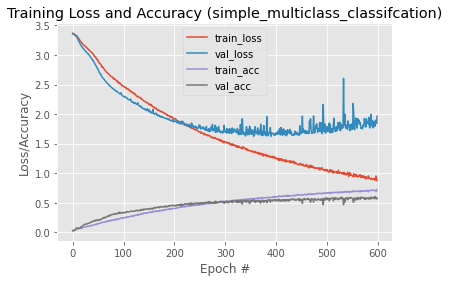

In [14]:

#evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

# print the performance report of the prediction
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model_history.history["loss"], label="train_loss")
plt.plot(N, model_history.history["val_loss"], label="val_loss")
plt.plot(N, model_history.history["accuracy"], label="train_acc")
plt.plot(N, model_history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

In [15]:
# Reshape the data so it can be used with convolutional neural networks 
img_rows, img_cols = 32, 32
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 3)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 3)

In [16]:
EPOCHS = 600

checkpoint2 = ModelCheckpoint('model2-checkpoint.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  

model2 = Sequential()
model2.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Activation('relu')) 
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Conv2D(512, (4, 4)))
model2.add(Dense(256))
model2.add(MaxPooling2D(pool_size=(4,4)))
model2.add(Flatten())  
model2.add(Dropout(0.5))
model2.add(Dense(len(train_classes)))
model2.add(Activation('softmax'))

model2.compile(loss="categorical_crossentropy", 
              optimizer='rmsprop',metrics=["accuracy"])

model2_history = model2.fit(X_train, trainY,
          epochs=50,
          batch_size=batch_size,
          validation_data=(X_test, testY), 
          callbacks=[checkpoint2])
model2.save_weights('model2.h5') 

Epoch 1/50
235/235 [==============================] - 32s 11ms/step - loss: 3.0744 - accuracy: 0.1393 - val_loss: 2.2947 - val_accuracy: 0.3197
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 2.1048 - accuracy: 0.3999 - val_loss: 1.7114 - val_accuracy: 0.5021
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 1.7261 - accuracy: 0.5068 - val_loss: 1.4953 - val_accuracy: 0.5862
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 1.4926 - accuracy: 0.5682 - val_loss: 1.4406 - val_accuracy: 0.5910
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 1.3527 - accuracy: 0.6141 - val_loss: 1.2081 - val_accuracy: 0.6543
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 1.2205 - accuracy: 0.6546 - val_loss: 1.3089 - val_accuracy: 0.6149
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 1.1379 - accuracy: 0.6733 - val_loss: 1.1578 - val_accuracy: 0.6723
Epoc

From the graph below it is evident that employing CNN, the model can perform more efficiently, increasing accuracy. Hence, this model can be further extended and fine tuned employing the same base model. 

[INFO] evaluating network...
                precision    recall  f1-score   support

        beanie       0.87      0.83      0.85        71
        bikini       0.94      0.74      0.83        61
       blazers       0.48      0.52      0.50        27
    boat-shoes       0.69      0.88      0.77        75
 boatneck-tops       0.62      0.56      0.59        82
      bodysuit       0.71      0.79      0.75        77
         boots       0.86      0.80      0.83        95
        bowtie       0.79      0.81      0.80        78
     bracelets       0.77      0.74      0.75        27
business-suits       0.38      0.27      0.32        44
     cami-tops       0.43      0.72      0.54        74
 chelsea-boots       0.85      0.85      0.85        72
         coats       0.92      0.51      0.66        70
     crop-tops       0.57      0.53      0.55        89
 demin-jackets       0.69      0.72      0.71        25
      earrings       0.85      0.94      0.90        68
 evening-gowns    

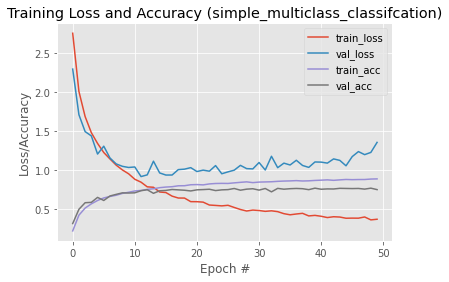

In [17]:
#evaluate the network
print("[INFO] evaluating network...")
predictions = model2.predict(X_test, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

# print the performance report of the prediction
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy for each epoch
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, model2_history.history["loss"], label="train_loss")
plt.plot(N, model2_history.history["val_loss"], label="val_loss")
plt.plot(N, model2_history.history["accuracy"], label="train_acc")
plt.plot(N, model2_history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

## Transfer Learning

In [18]:
external_classifier = '/content/drive/MyDrive/Colab Notebooks/BrandMind_Assessment/91Model.h5'

In [19]:
# Load the external classifier
 
from keras.models import load_model
t_model = load_model(external_classifier)

### Visualise the external classifier

In [20]:
t_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               819456    
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [21]:
# ll = tf.keras.layers.Flatten(input_shape=(28, 28))
ll = Flatten(input_shape=(32, 32))
ll = t_model.layers[4].output
ll = Dense(32)(ll)
ll = Dense(64)(ll)
ll = Dense(len(train_classes),activation="sigmoid")(ll)



from keras.models import Model
new_model = Model(inputs=t_model.input, outputs=ll)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                102432

### Load the MNIST Dataset

In [23]:
# Download MNIST Dataset for training/testing
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


### data pre-processing

In [24]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [25]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [27]:
epochs_ = 6
new_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)



t_model_history = new_model.fit(ds_train,
    epochs=epochs_,
    validation_data=ds_test)

new_model.save_weights('products_t_model.h5')
new_model.summary()

Epoch 1/6
469/469 [==============================] - 9s 9ms/step - loss: 0.3608 - sparse_categorical_accuracy: 0.8990 - val_loss: 0.0446 - val_sparse_categorical_accuracy: 0.9849
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0382 - val_sparse_categorical_accuracy: 0.9881
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.0296 - val_sparse_categorical_accuracy: 0.9904
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0413 - val_sparse_categorical_accuracy: 0.9873
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0422 - val_sparse_categorical_accuracy: 0.9886
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0092 - sparse_categorical_accu

[INFO] evaluating network...
predictions.argmax(axis=1) [26 28 11 ... 23  6  3]


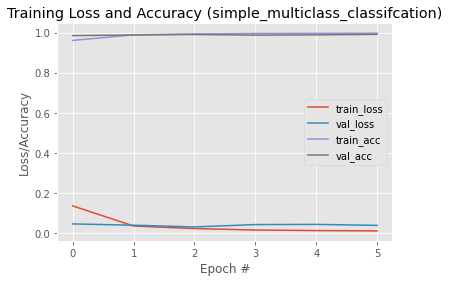

In [30]:
 
#evaluate the network
print("[INFO] evaluating network...")

# plot the training loss and accuracy for each epoch
N = np.arange(0, epochs_)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, t_model_history.history["loss"], label="train_loss")
plt.plot(N, t_model_history.history["val_loss"], label="val_loss")
plt.plot(N, t_model_history.history["sparse_categorical_accuracy"], label="train_acc")
plt.plot(N, t_model_history.history["val_sparse_categorical_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")